In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def display(img , cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

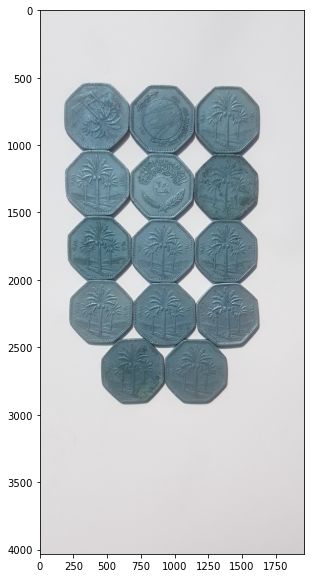

In [3]:
img = cv2.imread('iraqi_old_coins.jpg')
display(img)

In [4]:
# steps to be done :
# medianBlur
# gray scale
# threshold
# find contour

In [5]:
imgb = cv2.medianBlur(img,ksize =25)
# this will remove the corners inside the shape to avoide distractions.

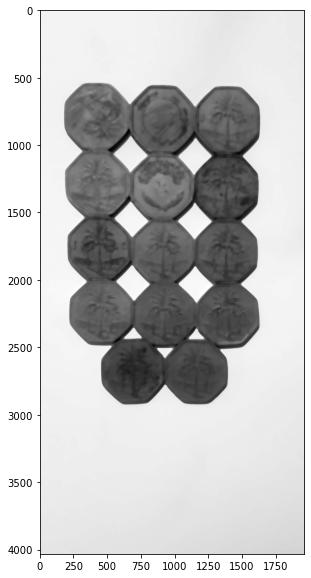

In [6]:
imgg =cv2.cvtColor(imgb , cv2.COLOR_BGR2GRAY)
display(imgg)
# changing the color map to gray to deal with threshold

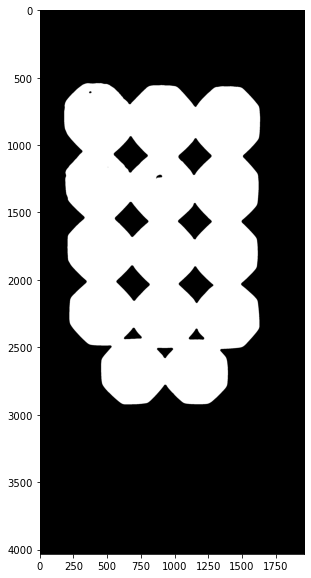

In [7]:
ret , imgthresh = cv2.threshold(imgg , 160 , 255 , cv2.THRESH_BINARY_INV) # cv2.THRESH_BINARY_INV == 1  
display(imgthresh)
# changing the colors into white and black by using thershold (any value more than 160 will consider 255 and any less will consider 0)

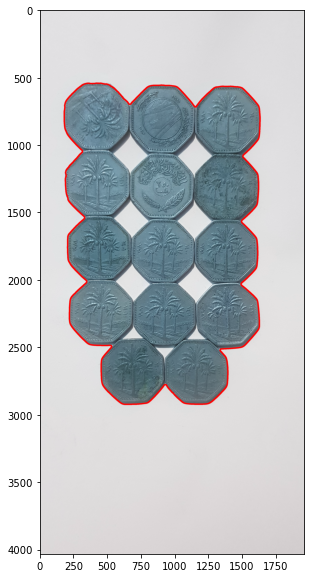

In [8]:
contours , hierarchy = cv2.findContours(imgthresh , cv2.RETR_CCOMP , cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours(img , contours , i , (255,0,0) ,10)
        
display(img)        

# finding the edges and drawing on the orginal image depending on the processed image ( output of theshold and finding contours)

# unfortuenatly the result not good to find all edges 
# so another techniqe need to apply


In [9]:

# the coin didnot get sepreated so use watershed
#
# steps to be done : 
# medainBlur
# gray
# threshold
# Noise removel  kernal --> ( cv2.morphologyEx)
# making bg ( =cv2.dilate(opening , kernal , iterations=3))
# making fg ( making (cv2.distanceTransform) --> threshold to get fg )
# changing fg to int (sure_fg = np.uint8(sure_fg))
# subtract bg & bf (unknown =cv2.subtract(sure_bg , sure_fg))
# making markers (ret , markers = cv2.connectedComponents(sure_fg))
# markers +=1 ,--------- markers[unknown == 255]=0 ---> any marker ==255 --> will be 0
# markers = cv2.watershed(img , markers)
#  markers = cv2.drawContour (sep_coin , contours , i , (255,0,0) , 10)

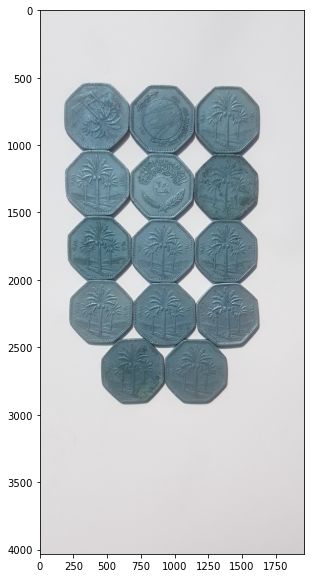

In [10]:
img = cv2.imread('iraqi_old_coins.jpg')
display(img)

In [11]:
imgb = cv2.medianBlur(img , 35)

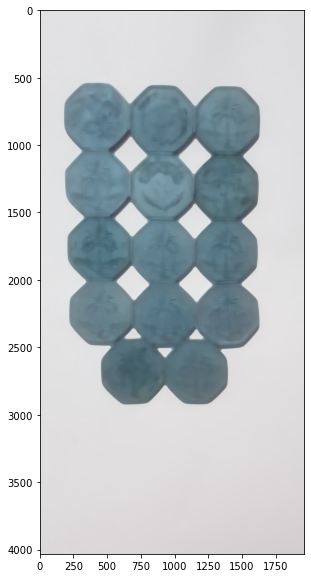

In [12]:
display(imgb)

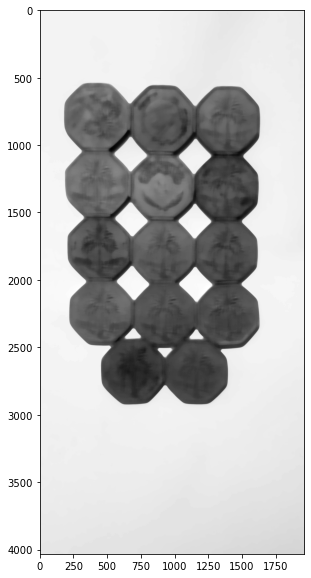

In [13]:
imgg = cv2.cvtColor(imgb , cv2.COLOR_BGR2GRAY)
display(imgg)

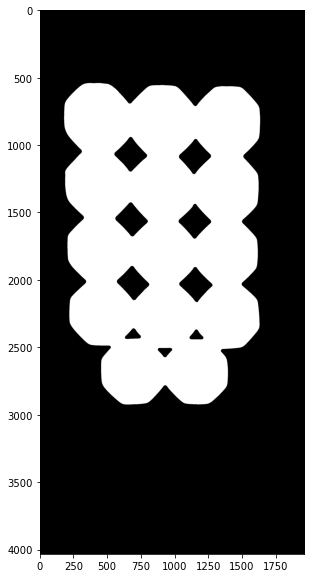

In [14]:
ret , imgthresh = cv2.threshold(imgg , 0 , 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
# using otsu method for threshold for smoth and better result
display(imgthresh)

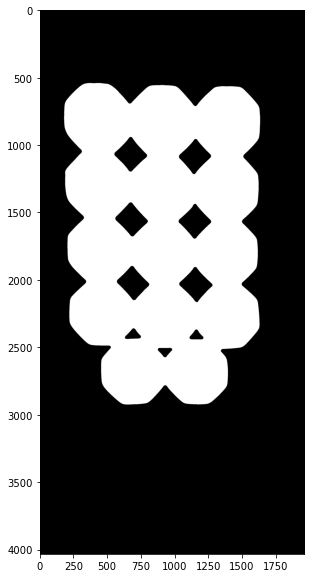

In [15]:
kernal= np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(imgthresh ,cv2.MORPH_OPEN , kernal , iterations=2) 
display(opening) 

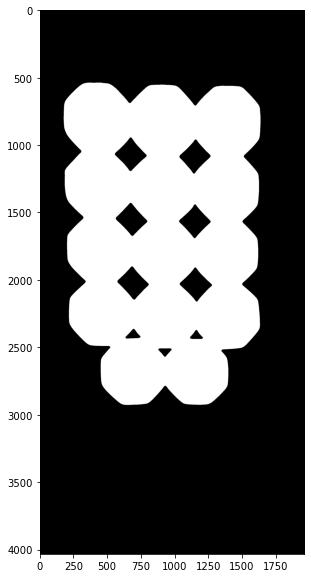

In [16]:
bg = cv2.dilate(opening , kernal , iterations=3)
display(bg)

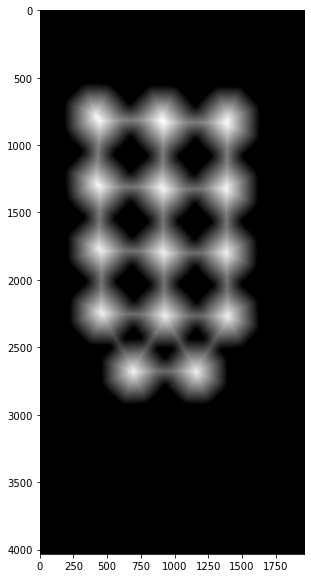

In [17]:
imgdis = cv2.distanceTransform( opening , cv2.DIST_L2 , maskSize=5)
# in distance transform as bits far from zeros will brighter !! 
display(imgdis)

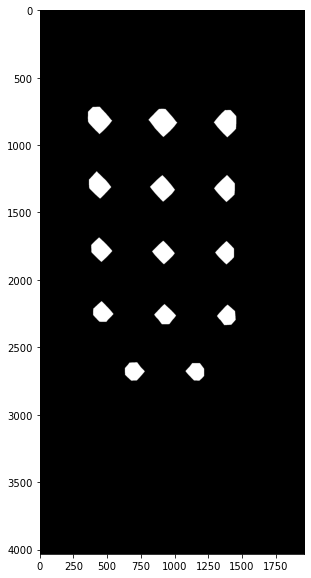

In [18]:
ret , fg = cv2.threshold(imgdis , 0.7 * imgdis.max() , 255 , 0)
# now the seeds is ready for watershed algorithem 
display(fg)

In [19]:
fg = np.uint8(fg)

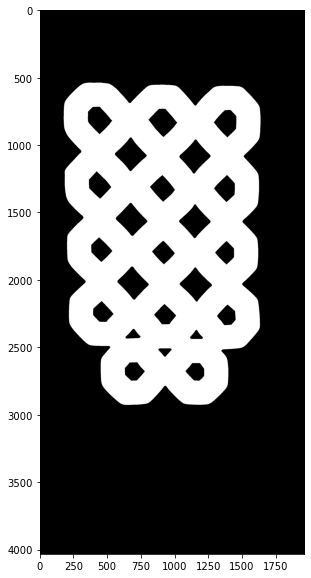

In [20]:
unknown = cv2.subtract(bg , fg)
#unknown = cv2.subtract( opening , fg) this will make the edges not smooth so bg(delight opening will be used to imporove the final result) 
display(unknown)

In [21]:
a , marker = cv2.connectedComponents(fg)
marker

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

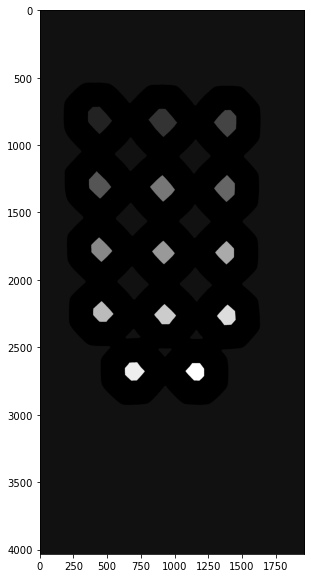

In [22]:
marker = marker+1
marker[unknown == 255 ] =0
display(marker)

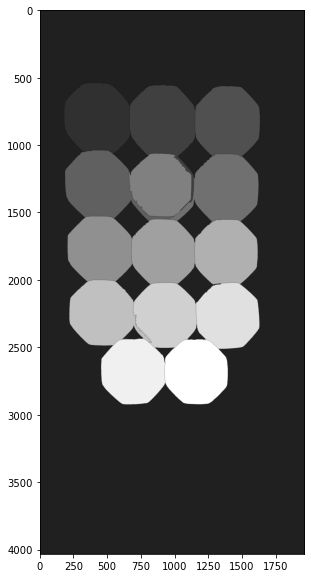

In [23]:
indicaters = cv2.watershed( img , marker)
display(indicaters)

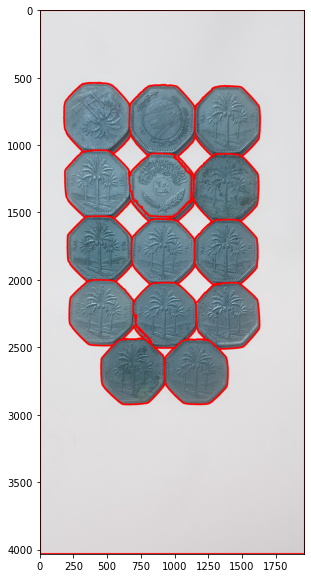

In [24]:
contour , hierarchy = cv2.findContours(indicaters , cv2.RETR_CCOMP , cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contour)):
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours(img , contour , i, (255,0,0),10)
        
display(img)        